In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy import stats, special

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV



from scipy import stats
from scipy import special
from xgboost import XGBClassifier



from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [4]:
df=pd.read_csv("C:/Users/armaa/OneDrive/Documents/sonikaML/winequality-red.csv")

In [5]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [6]:
df.shape

(1599, 12)

In [7]:
df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [9]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [10]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [15]:
df.duplicated().any()

True

In [16]:
df.duplicated().sum()

240

In [17]:
df[df.duplicated()]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.4             0.700         0.00            1.90      0.076   
11              7.5             0.500         0.36            6.10      0.071   
27              7.9             0.430         0.21            1.60      0.106   
40              7.3             0.450         0.36            5.90      0.074   
65              7.2             0.725         0.05            4.65      0.086   
...             ...               ...          ...             ...        ...   
1563            7.2             0.695         0.13            2.00      0.076   
1564            7.2             0.695         0.13            2.00      0.076   
1567            7.2             0.695         0.13            2.00      0.076   
1581            6.2             0.560         0.09            1.70      0.053   
1596            6.3             0.510         0.13            2.30      0.076   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4                    11.0                  34.0  0.99780  3.51       0.56   
11                   17.0                 102.0  0.99780  3.35       0.80   
27                   10.0                  37.0  0.99660  3.17       0.91   
40                   12.0                  87.0  0.99780  3.33       0.83   
65                    4.0                  11.0  0.99620  3.41       0.39   
...                   ...                   ...      ...   ...        ...   
1563                 12.0                  20.0  0.99546  3.29       0.54   
1564                 12.0                  20.0  0.99546  3.29       0.54   
1567                 12.0                  20.0  0.99546  3.29       0.54   
1581                 24.0                  32.0  0.99402  3.54       0.60   
1596                 29.0                  40.0  0.99574  3.42       0.75   

      alcohol  quality  
4         9.4        5  
11       10.5        5  
27        9.5        5  
40       10.5        5  
65       10.9        5  
...       ...      ...  
1563     10.1        5  
1564     10.1        5  
1567     10.1        5  
1581     11.3        5  
1596     11.0        6  

[240 rows x 12 columns]

In [18]:
df.drop_duplicates()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
5               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
5                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1593                 28.0                  38.0  0.99651  3.42       0.82   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
5         9.4        5  
...       ...      ...  
1593      9.5        6  
1594     10.5        5  
1595     11.2        6  
1597     10.2        5  
1598     11.0        6  

[1359 rows x 12 columns]

In [20]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [21]:
# Mapping target feature with categorical terms that give more attractive views for data set
df['quality_cat']=[1 if x>=7 else 0 for x in df['quality']]

In [22]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  quality_cat  
0         9.4        5            0  
1         9.8        5            0  
2         9.8        5            0  
3         9.8        6            0  
4         9.4        5            0  
...       ...      ...          ...  
1594     10.5        5            0  
1595     11.2        6            0  
1596     11.0        6            0  
1597     10.2        5            0  
1598     11.0        6            0  

[1599 rows x 13 columns]

In [23]:
df.describe().T

count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   
quality_cat           1599.0   0.135710   0.342587  0.00000   0.0000   

                           50%        75%        max  
fixed acidity          7.90000   9.200000   15.90000  
volatile acidity       0.52000   0.640000    1.58000  
citric acid            0.26000   0.420000    1.00000  
residual sugar         2.20000   2.600000   15.50000  
chlorides              0.07900   0.090000    0.61100  
free sulfur dioxide   14.00000  21.000000   72.00000  
total sulfur dioxide  38.00000  62.000000  289.00000  
density                0.99675   0.997835    1.00369  
pH                     3.31000   3.400000    4.01000  
sulphates              0.62000   0.730000    2.00000  
alcohol               10.20000  11.100000   14.90000  
quality                6.00000   6.000000    8.00000  
quality_cat            0.00000   0.000000    1.00000

In [24]:
# Visualizing the distribution of each numerical feature using histogram
numerical_features = df.select_dtypes(include=['float64'])

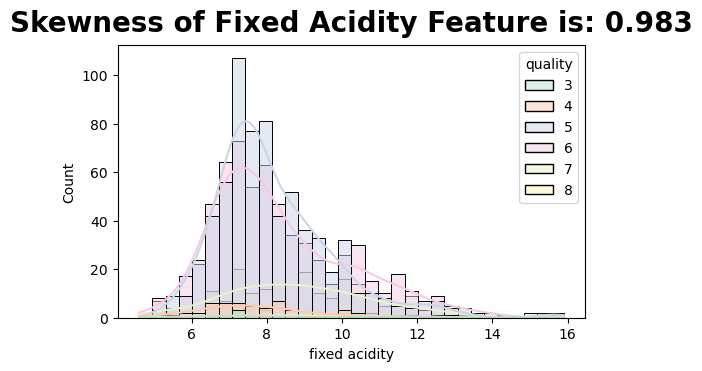

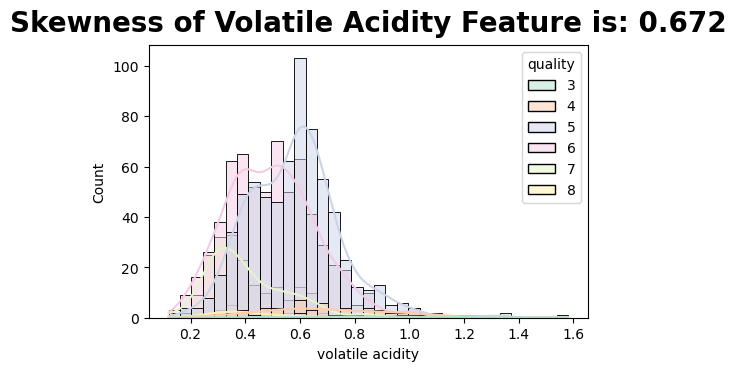

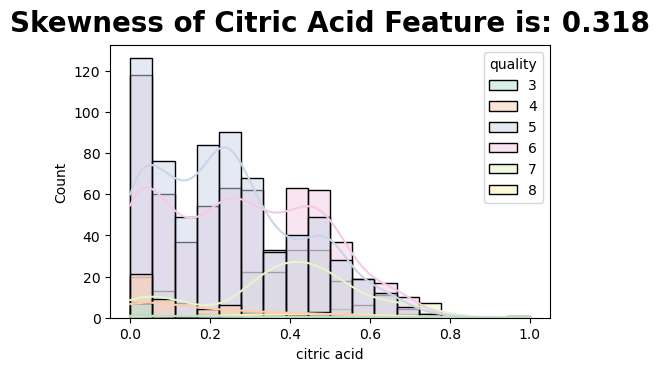

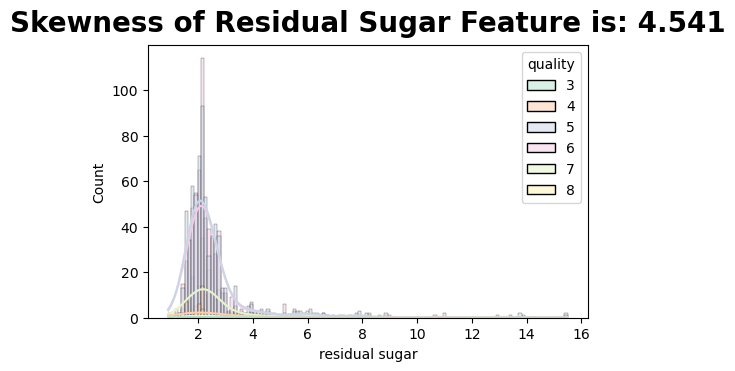

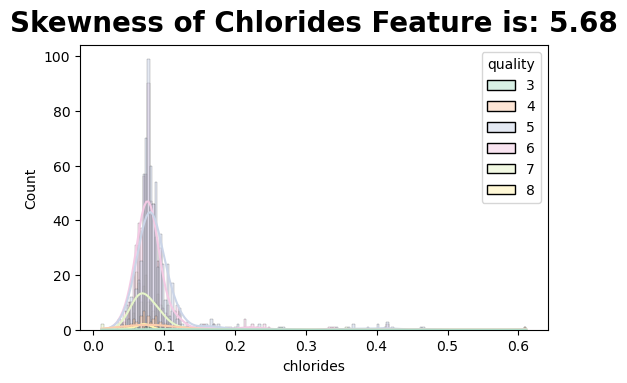

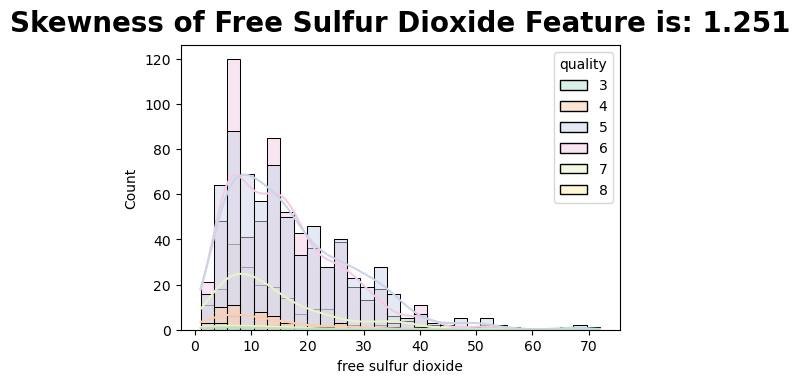

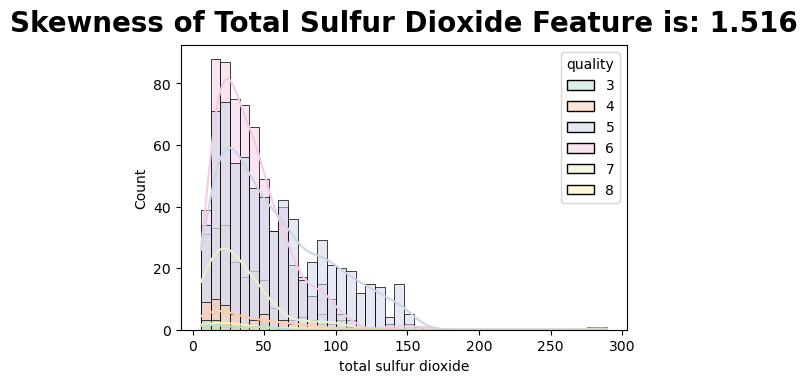

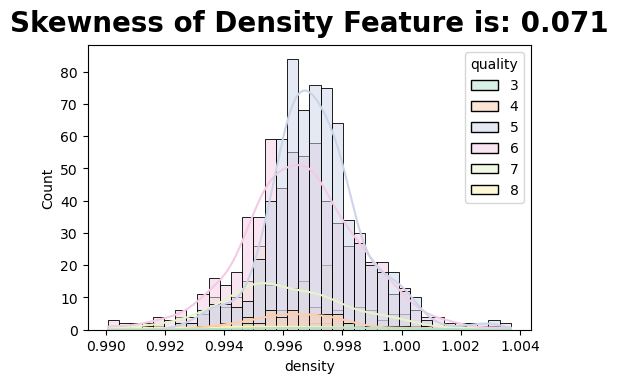

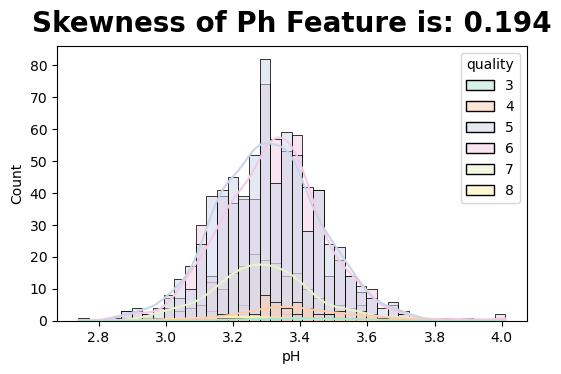

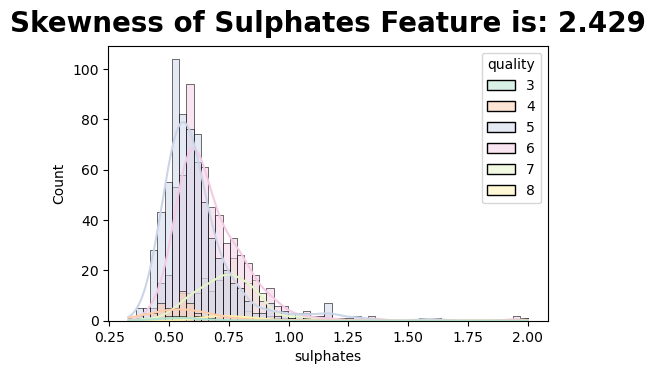

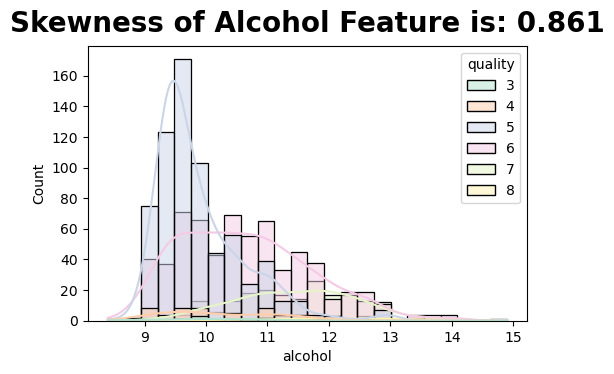

<Figure size 640x480 with 0 Axes>

In [26]:
# Visualizing the distribution of each numerical feature using histograms

for i, column in enumerate(numerical_features.columns):
    
    plt.figure(figsize=(20, 10))
    plt.subplot(3, 4, i+1)
    sns.histplot(x=column,kde=True,hue="quality",data=df, palette="Pastel2")
    skew = numerical_features[column].skew()
    plt.title(f"Skewness of {column.title()} Feature is: {round(skew,3)}",fontweight="black",size=20,pad=10)
    plt.tight_layout()
    plt.show()
plt.tight_layout()
plt.show()

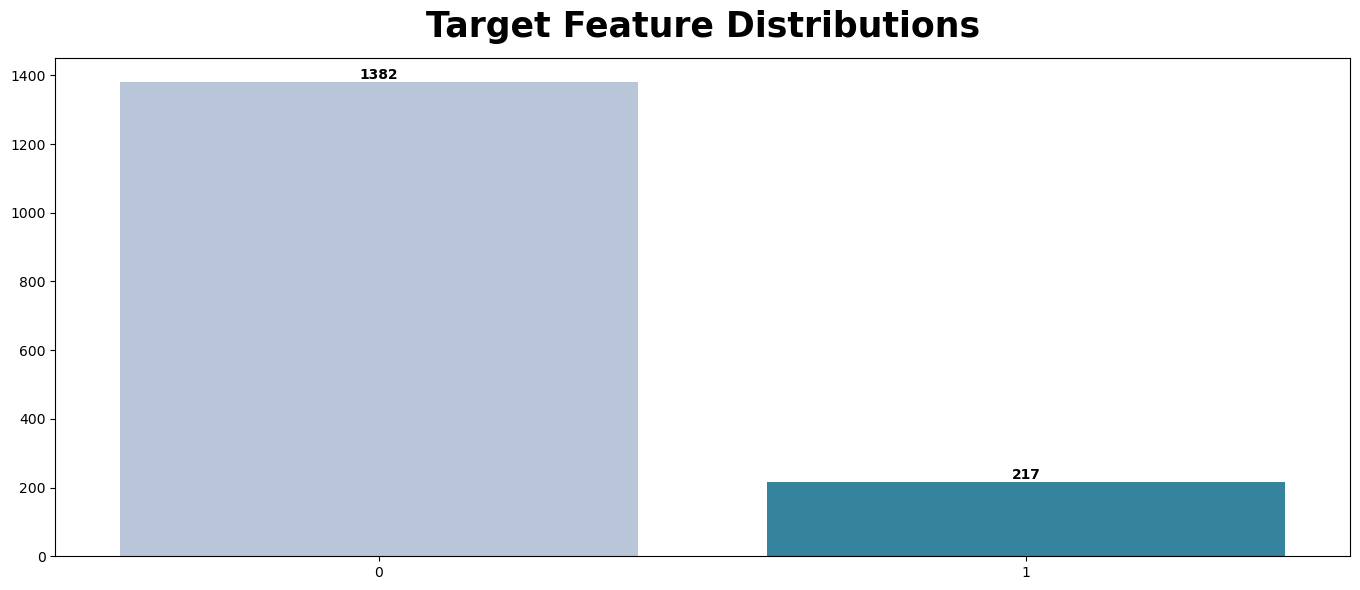

In [27]:
plt.figure(figsize=(13.7,6))
z =df["quality_cat"].value_counts()
sns.barplot(x=z.index, y=z.values, order=z.index, palette='PuBuGn')
plt.title("Target Feature Distributions",fontweight="black",size=25,pad=15)
for index,value in enumerate(z.values):
    plt.text(index,value,value, ha="center", va="bottom",fontweight="black")

plt.tight_layout()
plt.show()

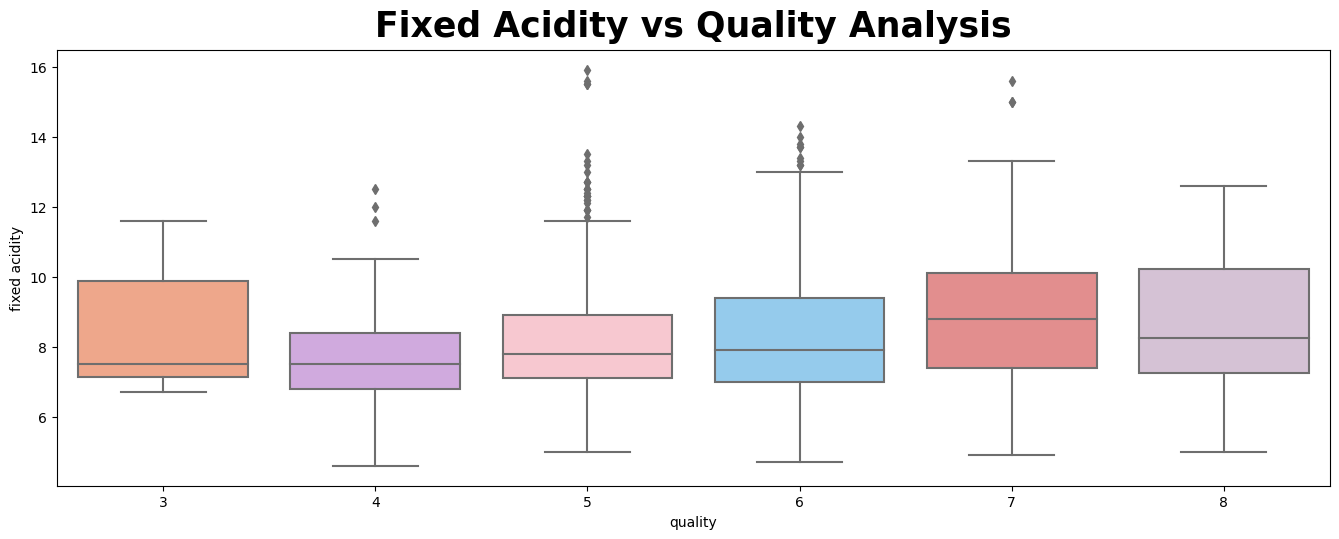

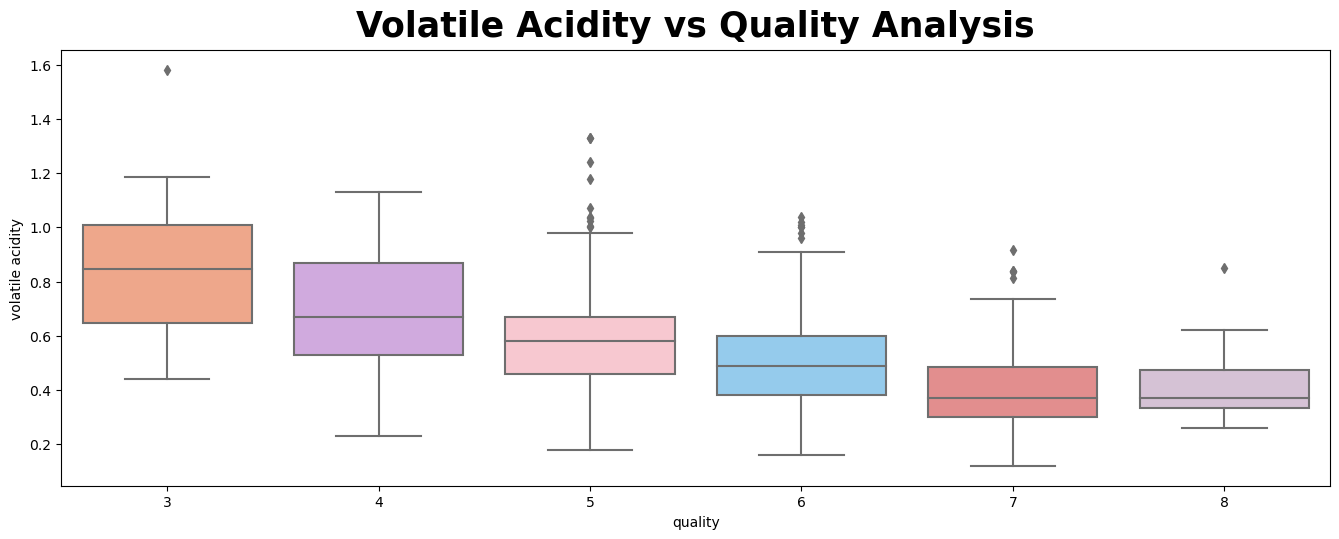

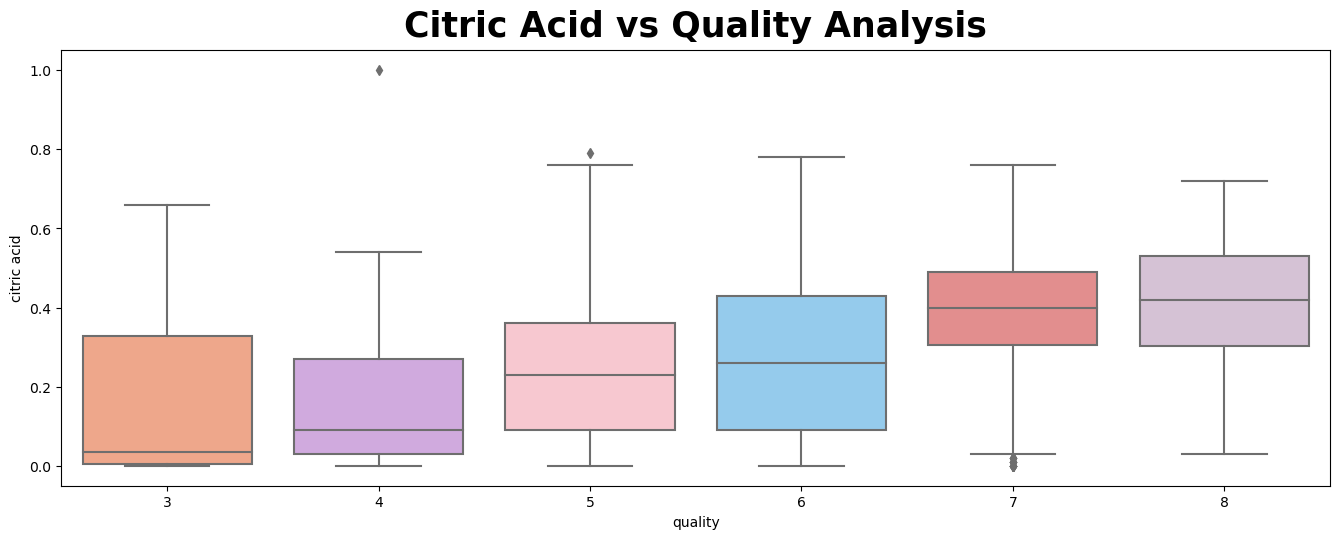

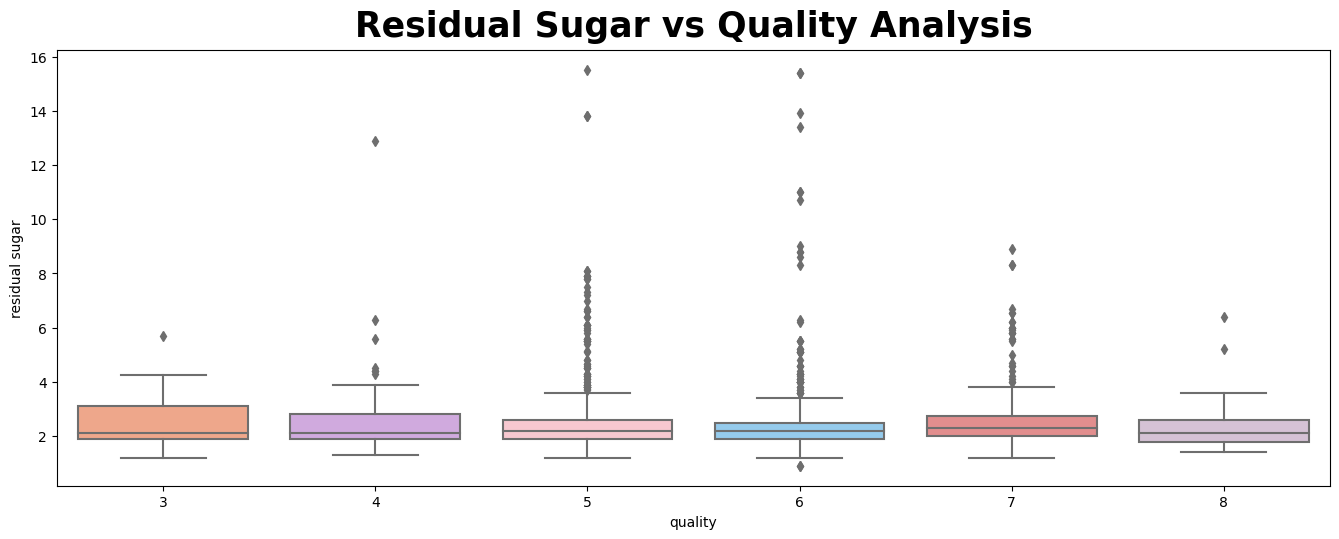

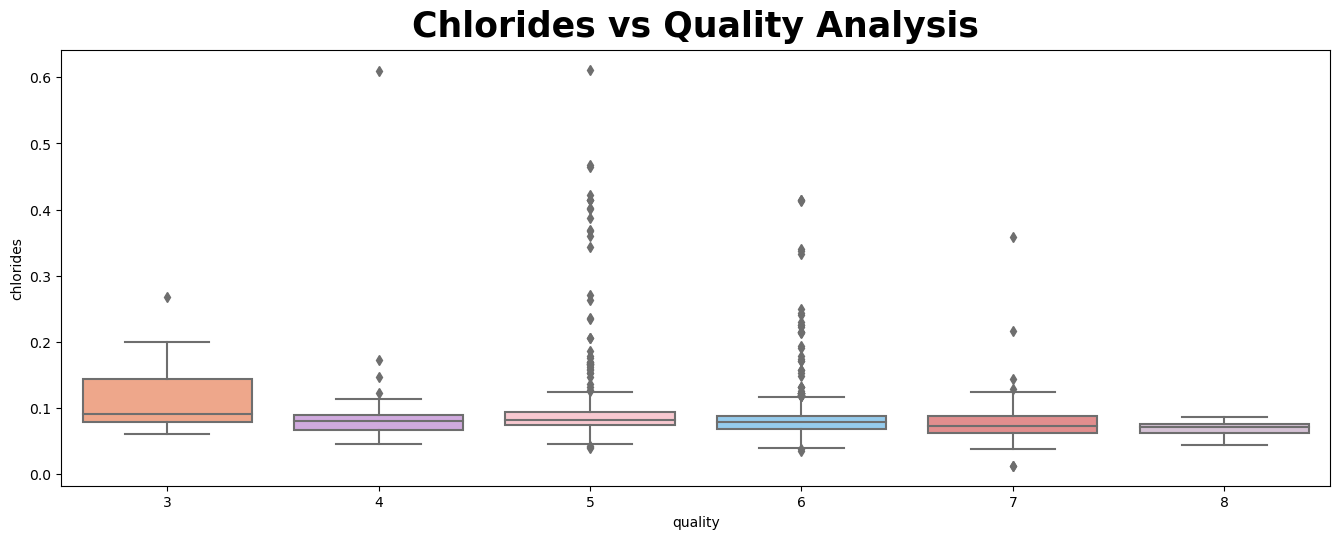

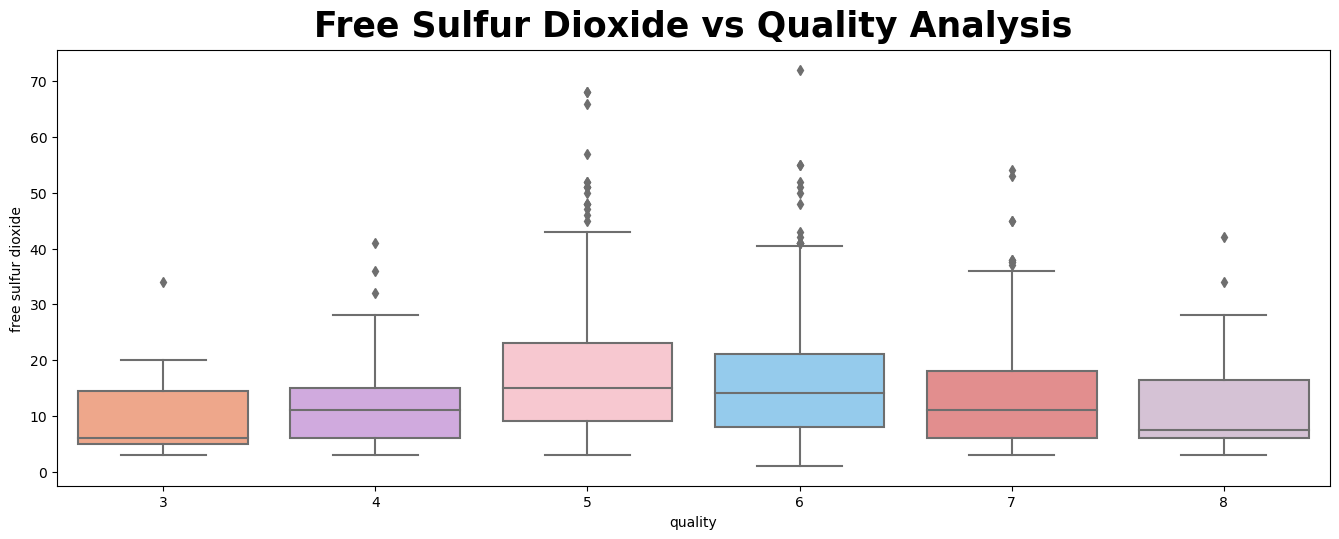

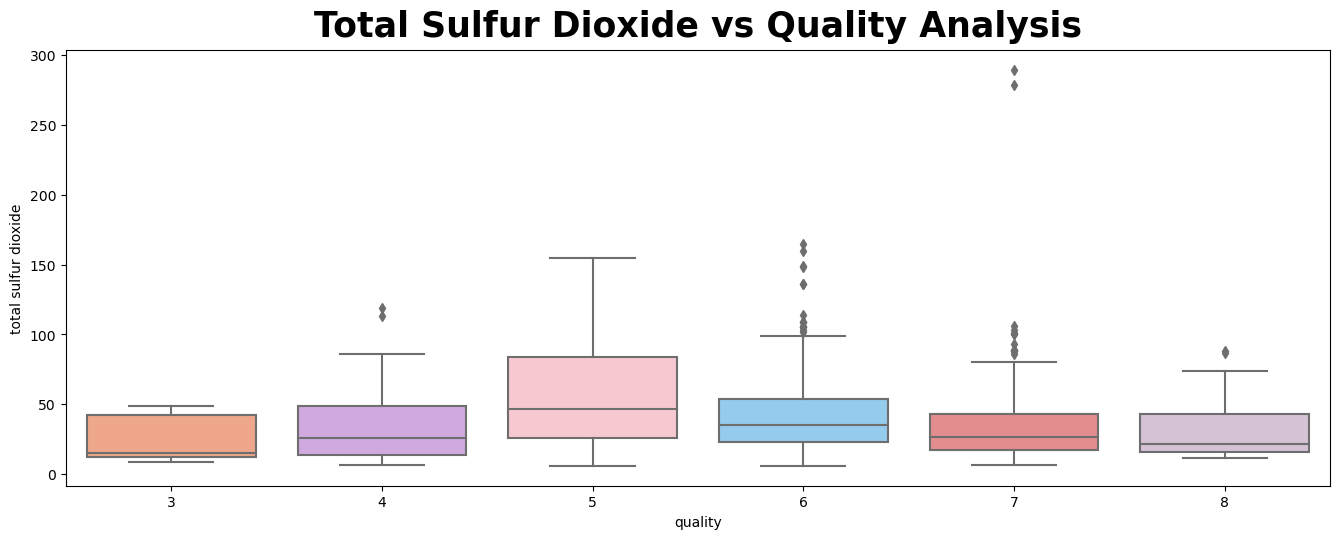

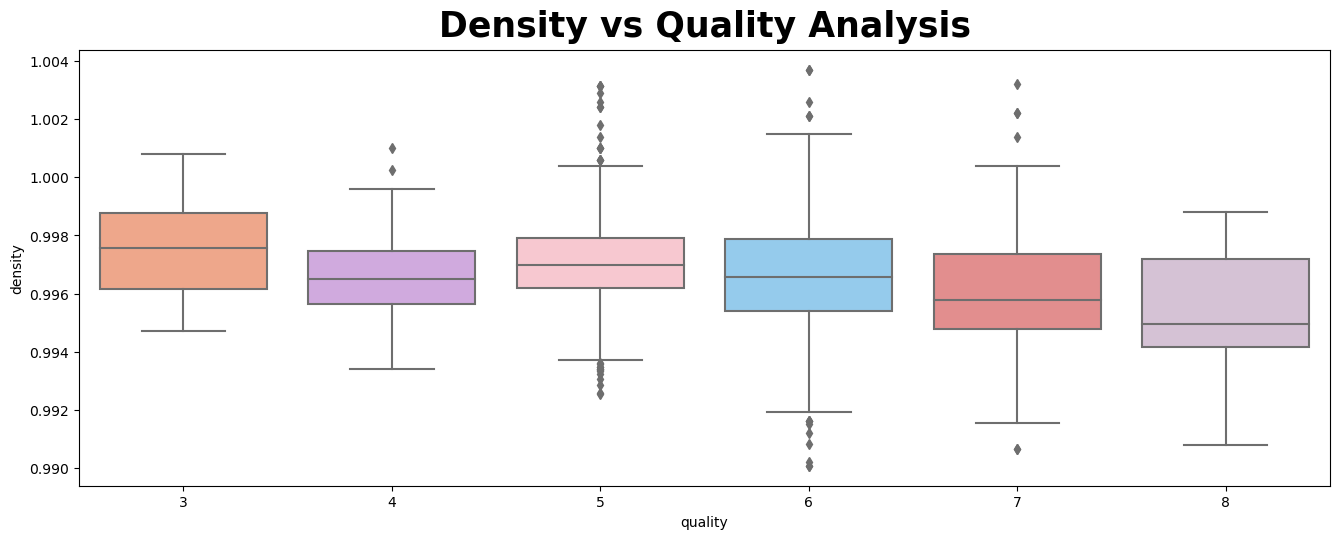

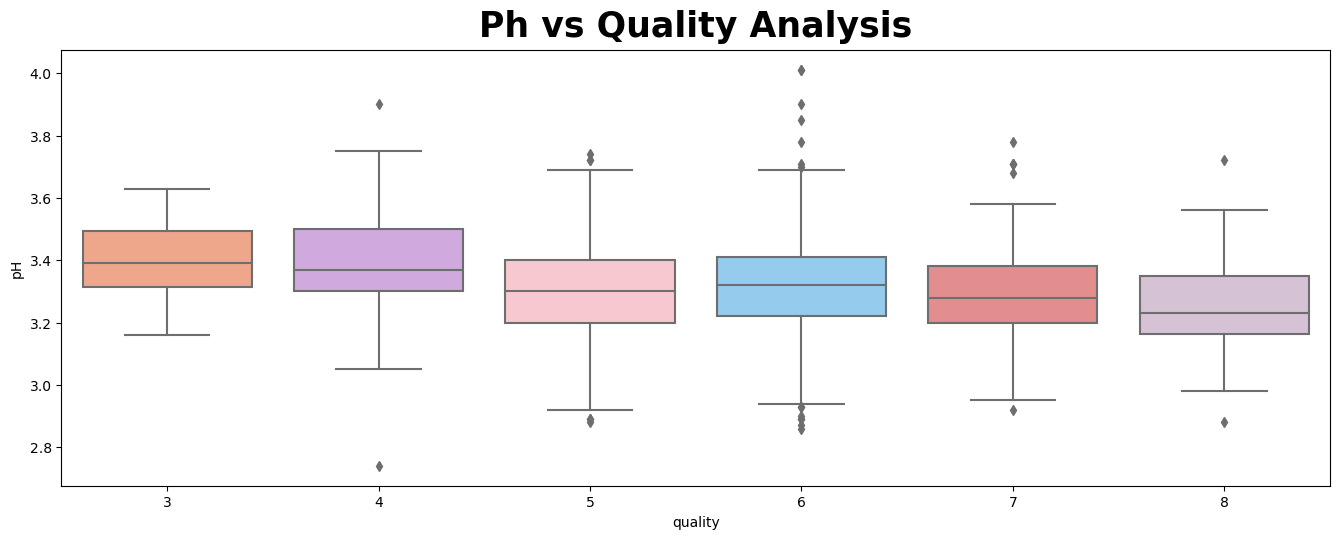

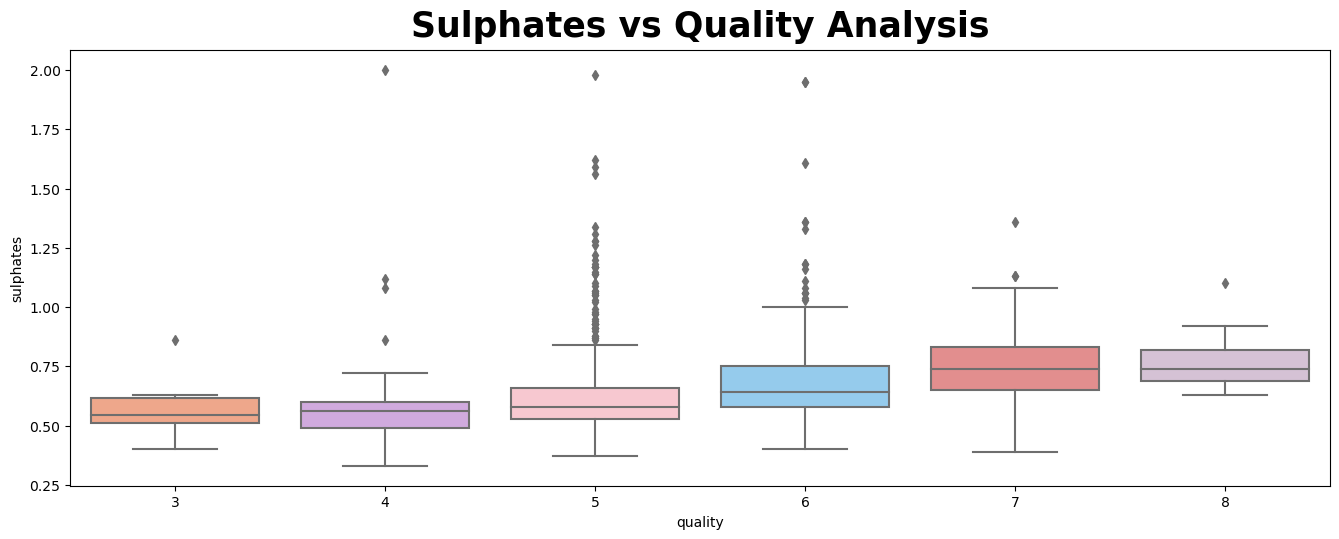

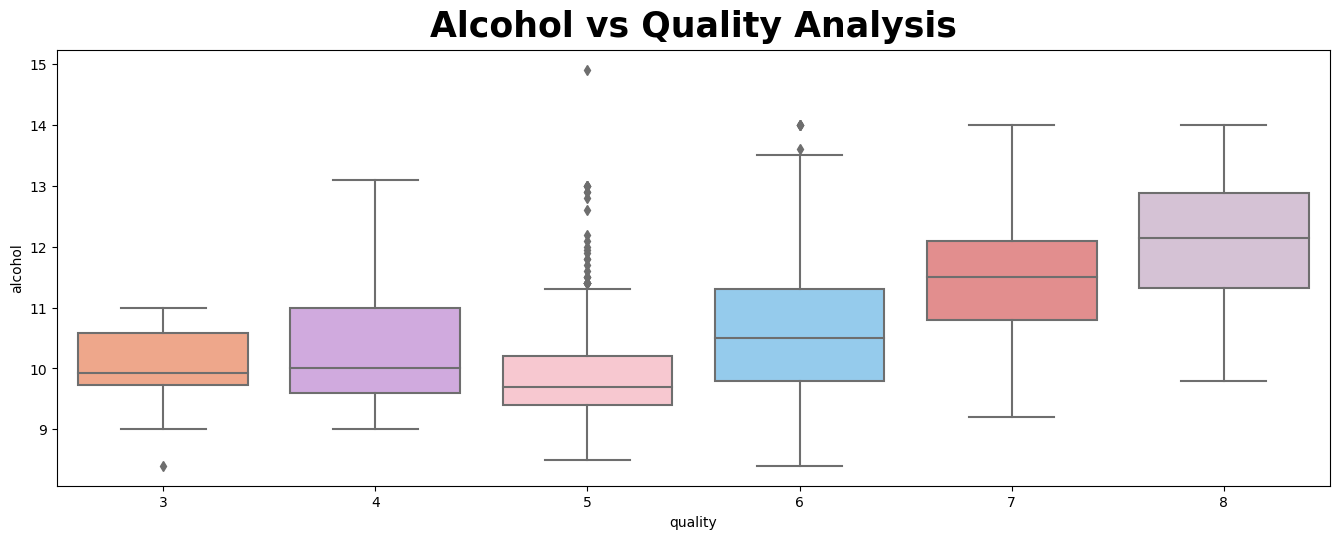

In [28]:
for i, column in enumerate(numerical_features.columns):
    plt.figure(figsize=(13.5,10))
    plt.subplot(2,1,1)
    sns.boxplot(x=df['quality'],y=column, data=numerical_features, palette=["#FFA07A", "#D4A1E7", "#FFC0CB", "#87CEFA", "#F08080", "#D8BFD8"])
    plt.title(f"{column.title()} vs Quality Analysis",fontweight="black",size=25,pad=10,)
    plt.tight_layout()
    plt.show()

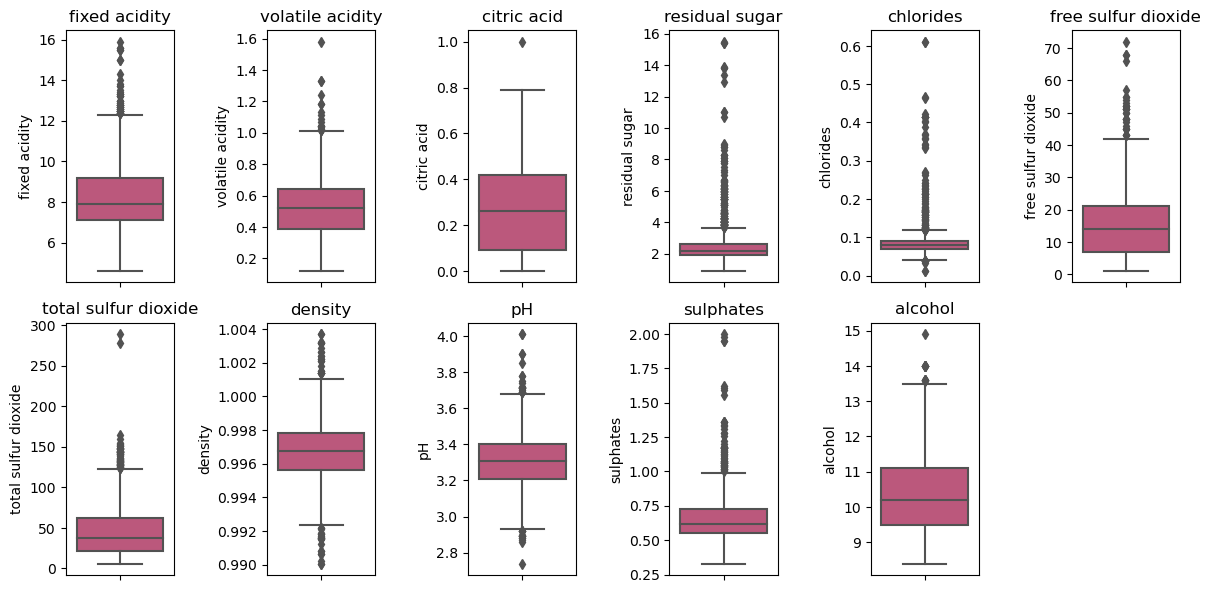

In [29]:
#Visualizing Central tendencies using box plots
plt.figure(figsize=(12,6))
for i, column in enumerate(numerical_features.columns):
    plt.subplot(2,6,i+1)
    sns.boxplot(y=df[column],palette='plasma')
    plt.title(column)
plt.tight_layout()
plt.show()

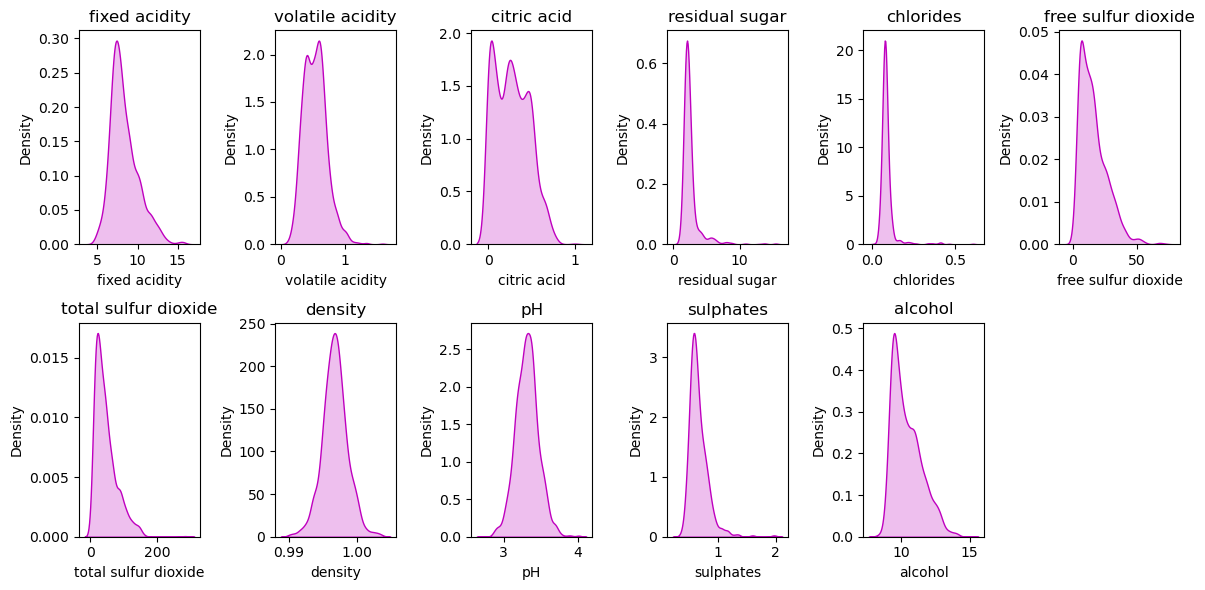

In [30]:
#Visualizing the spread of the data using density plots
plt.figure(figsize=(12,6))
for i,column in enumerate(numerical_features.columns):
    plt.subplot(2,6,i+1)
    sns.kdeplot(df[column],color='m',fill=True)
    plt.title(column)
plt.tight_layout()
plt.show()

In [31]:
#Multivariate Analysis
multivariate_data=df.drop(columns=['quality'])

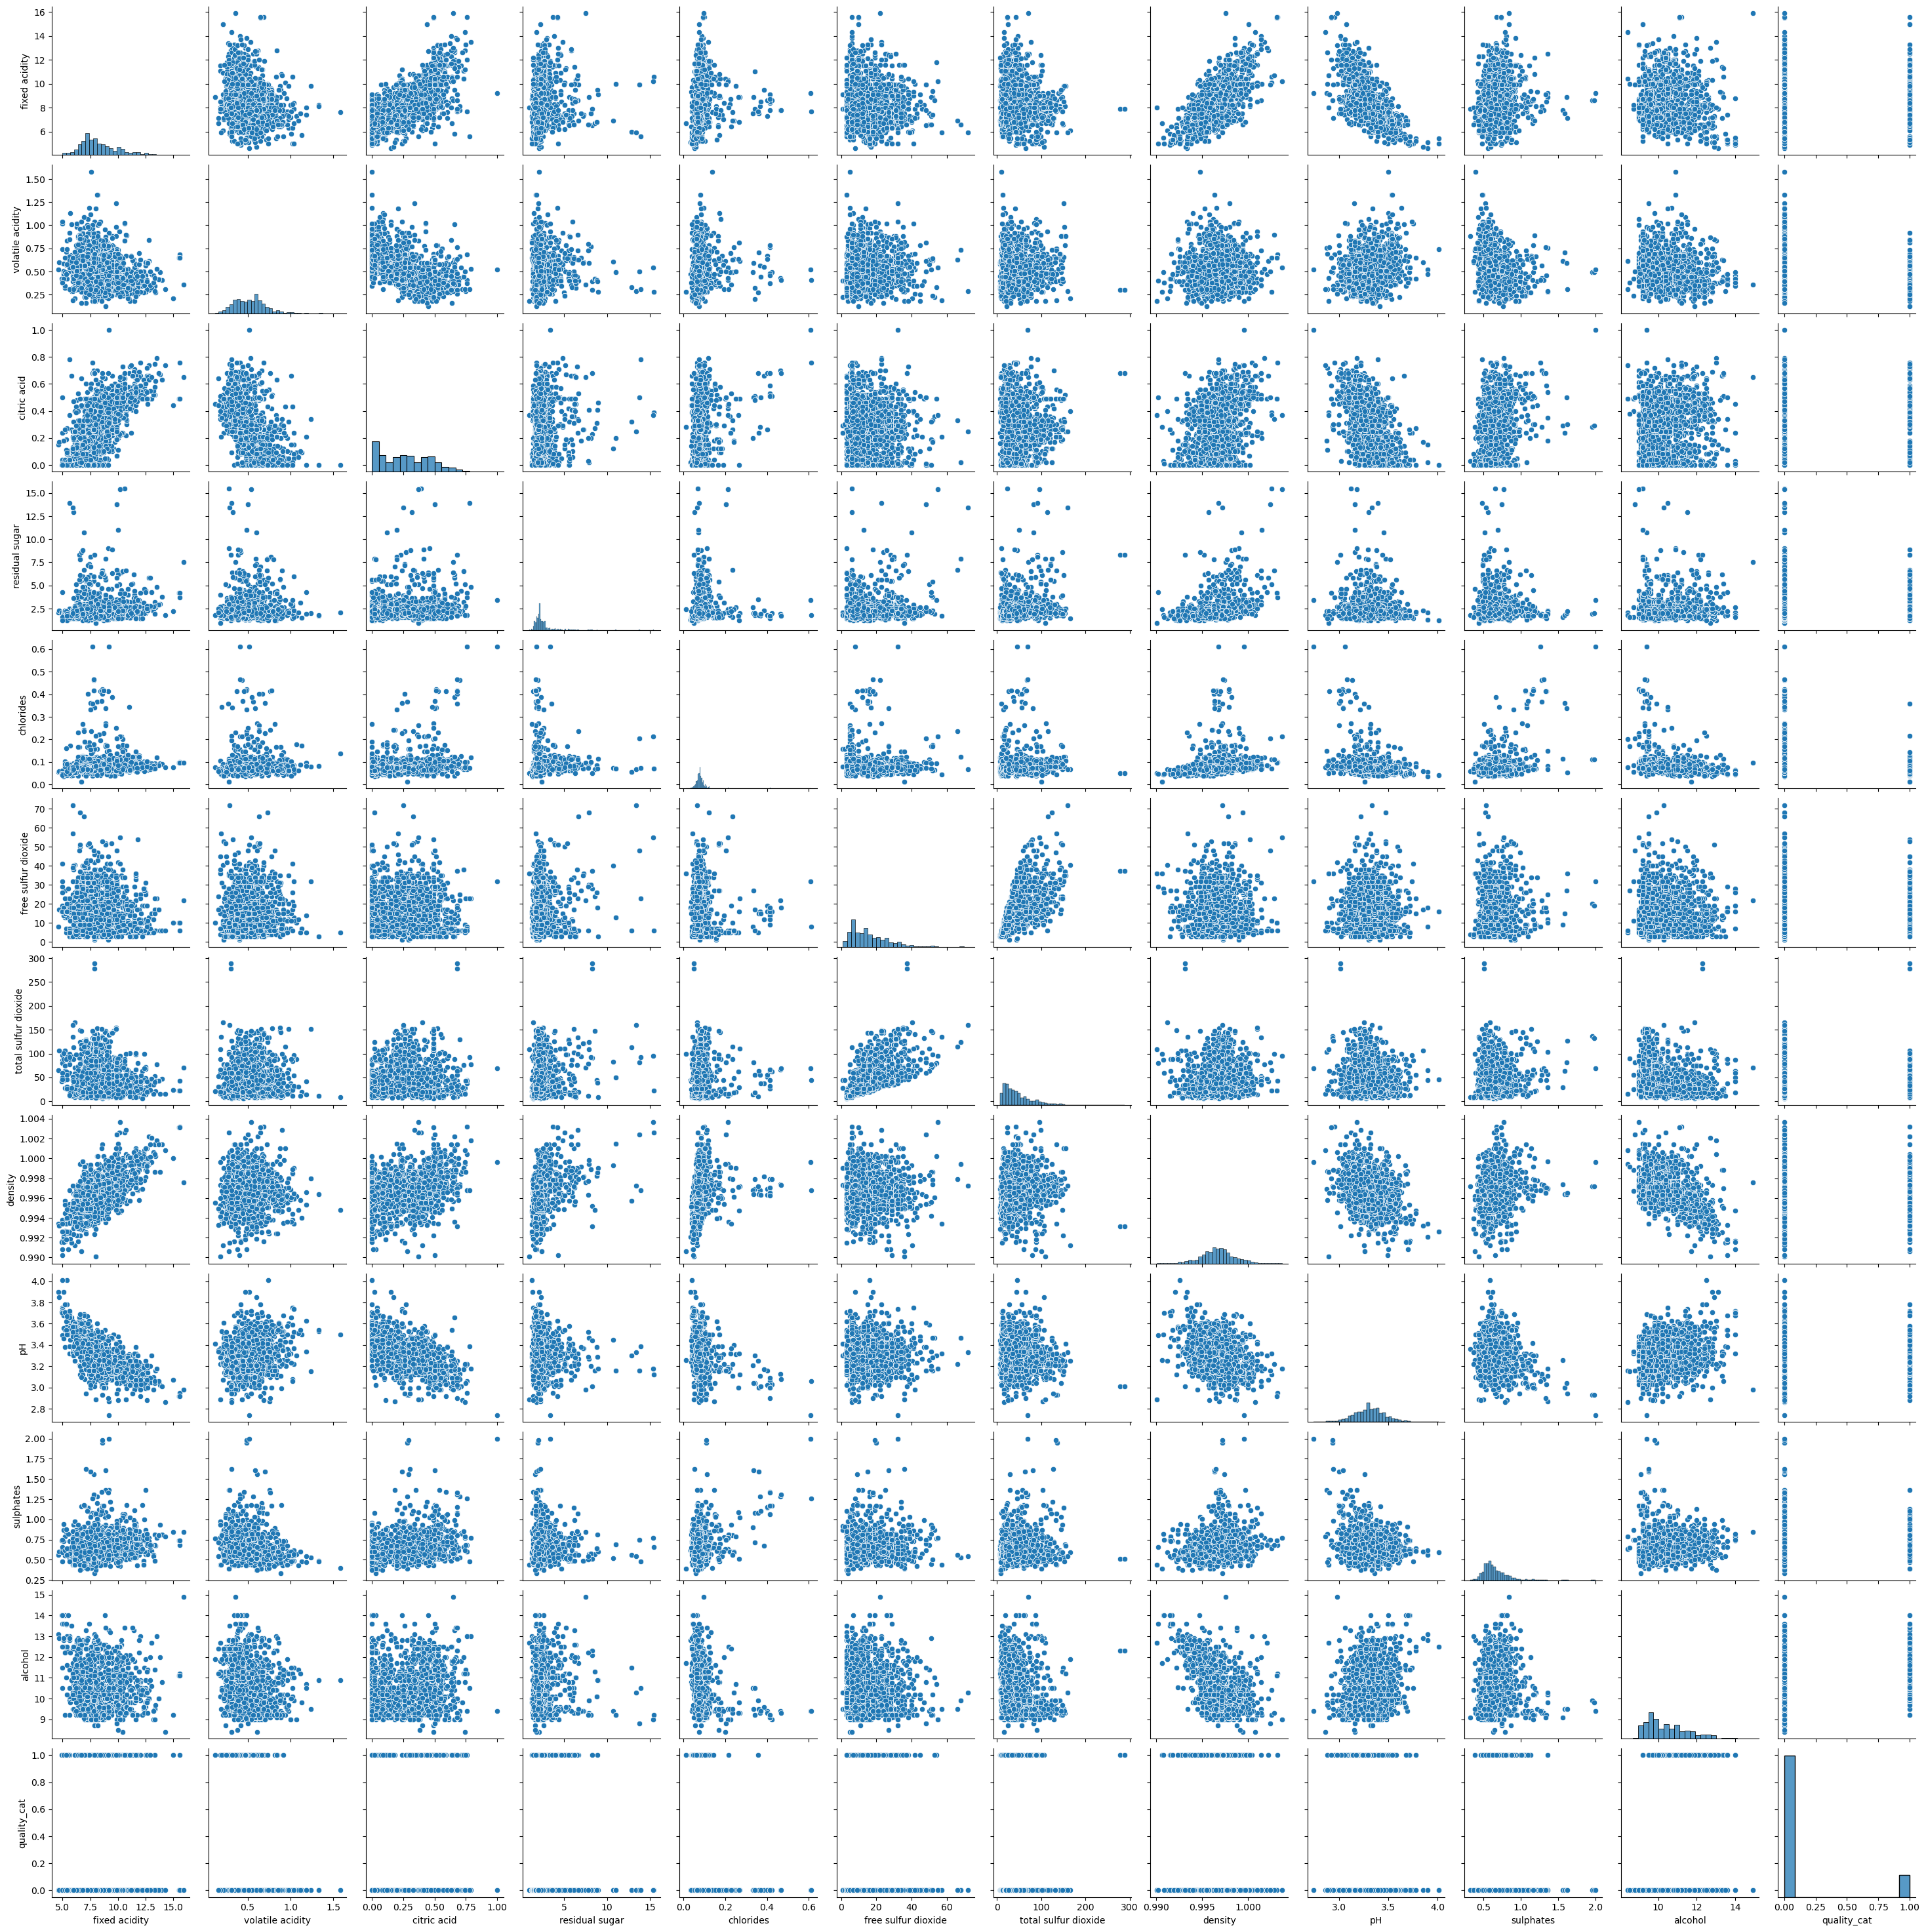

In [32]:
#Pair plot to visualize interaction and relationships
#Custom color palette
custom_palette=["#FFA07A","#D4A1E7","#FFC0CB","#87CEFA","#F08080","#D8BFD8"]
sns.pairplot(multivariate_data,palette=custom_palette)
plt.show()

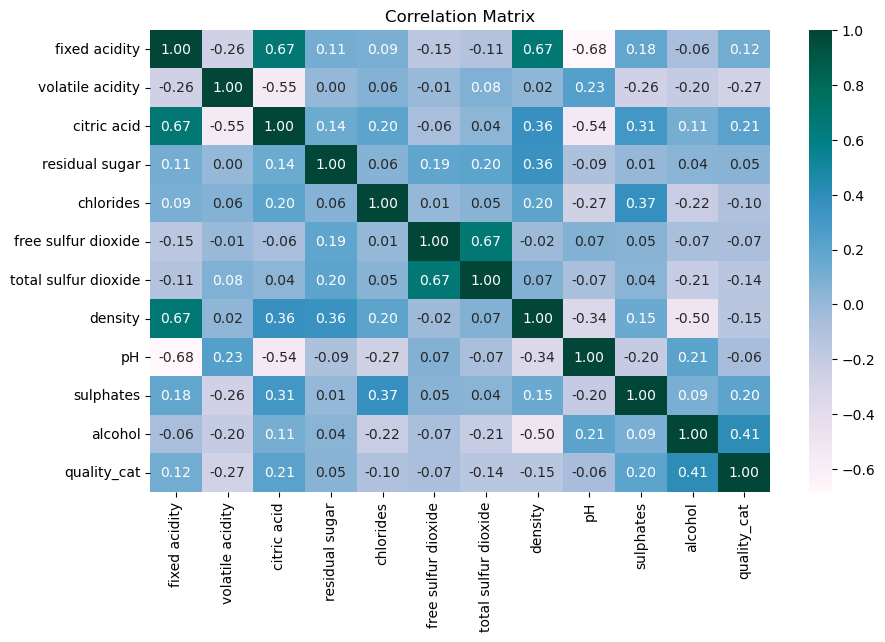

In [33]:
#Heatmap correlation matrix to show the correlation between features
plt.figure(figsize=(10,6))
correlation_matrix=multivariate_data.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='PuBuGn',fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

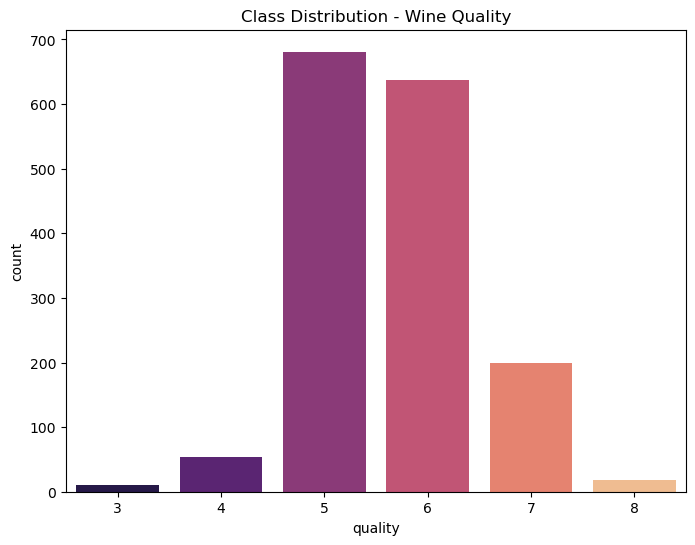

In [34]:
plt.figure(figsize=(8,6))
sns.countplot(x='quality',data=df,palette="magma")
plt.title('Class Distribution - Wine Quality')
plt.show()

In [40]:
#Statistical Analysis
#ANOVA Test to Analyze the Features
f_scores = {}
p_values = {}

for column in df.columns.drop('quality_cat'):
    f_score, p_value = stats.f_oneway(df[column],df["quality"])
    
    f_scores[column] = f_score
    p_values[column] = p_value

In [41]:
f_scores

{'fixed acidity': 3126.2099158743413,
 'volatile acidity': 60979.236731872996,
 'citric acid': 66691.9609499734,
 'residual sugar': 5810.011983676937,
 'chlorides': 75227.3975826984,
 'free sulfur dioxide': 1522.992177370879,
 'total sulfur dioxide': 2462.1519957908,
 'density': 52769.95571626932,
 'pH': 12785.317100331964,
 'sulphates': 58190.517992045636,
 'alcohol': 20494.880945834375,
 'quality': -2.0333937411700408e-30}

In [42]:
p_values

{'fixed acidity': 0.0,
 'volatile acidity': 0.0,
 'citric acid': 0.0,
 'residual sugar': 0.0,
 'chlorides': 0.0,
 'free sulfur dioxide': 8.818609553995557e-273,
 'total sulfur dioxide': 0.0,
 'density': 0.0,
 'pH': 0.0,
 'sulphates': 0.0,
 'alcohol': 0.0,
 'quality': nan}

In [54]:
#Create a DataFrame from the dictionary of f_scores and p_values
f_scores_and_p_values=pd.DataFrame.from_dict({'f_scores':f_scores, 'p_values':p_values},orient='index').T


In [55]:
f_scores_and_p_values

f_scores       p_values
fixed acidity         3.126210e+03   0.000000e+00
volatile acidity      6.097924e+04   0.000000e+00
citric acid           6.669196e+04   0.000000e+00
residual sugar        5.810012e+03   0.000000e+00
chlorides             7.522740e+04   0.000000e+00
free sulfur dioxide   1.522992e+03  8.818610e-273
total sulfur dioxide  2.462152e+03   0.000000e+00
density               5.276996e+04   0.000000e+00
pH                    1.278532e+04   0.000000e+00
sulphates             5.819052e+04   0.000000e+00
alcohol               2.049488e+04   0.000000e+00
quality              -2.033394e-30            NaN

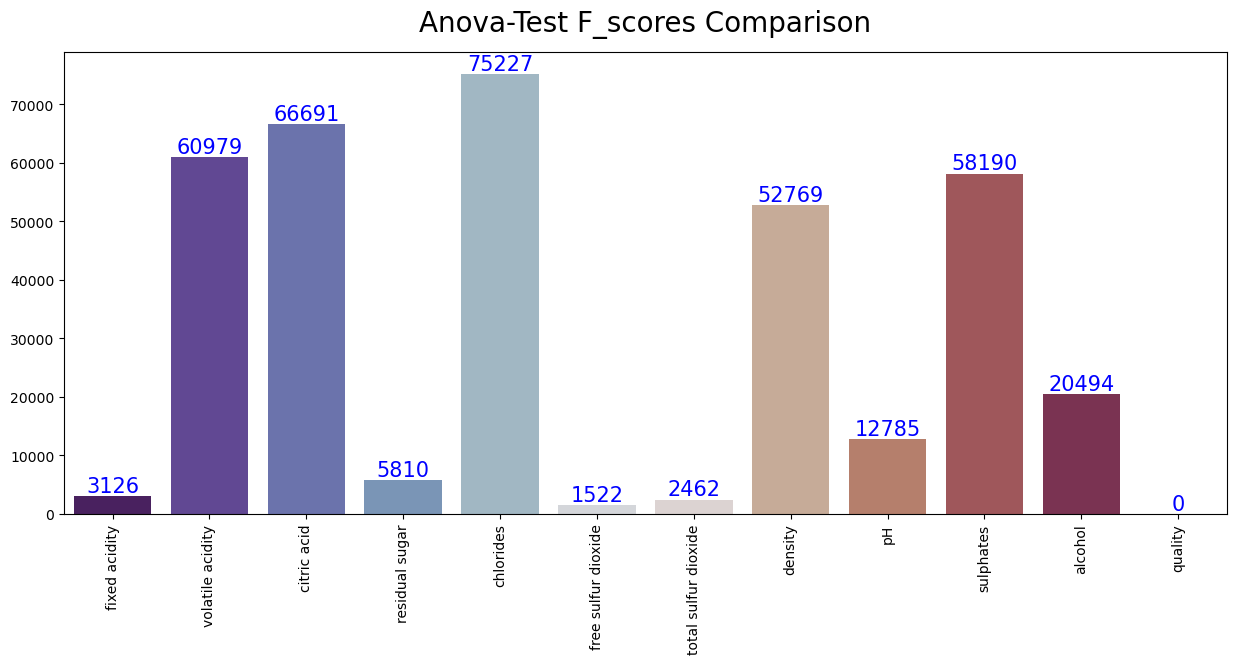

In [57]:
plt.figure(figsize=(15, 6))
keys = list(f_scores_and_p_values.index)
values = list(f_scores_and_p_values['f_scores'])

sns.barplot(x=keys, y=values, palette='twilight_shifted')
plt.title("Anova-Test F_scores Comparison", fontweight="normal", size=20, pad=15,color='black')
plt.xticks(rotation=90)

for index, value in enumerate(values):
    plt.text(index, value, int(value), ha='center', va='bottom', fontweight='normal', size=15,color='blue')

plt.show()


In [58]:
#Treatment of Skewness and Transformation
wine=df.copy()
columns_to_remove=["quality","quality_cat"]
wine.drop(columns=columns_to_remove,inplace=True)

In [59]:
skew_WD=wine.skew().to_frame().rename(columns={0:"Skewness"})
print(skew_WD)

                      Skewness
fixed acidity         0.982751
volatile acidity      0.671593
citric acid           0.318337
residual sugar        4.540655
chlorides             5.680347
free sulfur dioxide   1.250567
total sulfur dioxide  1.515531
density               0.071288
pH                    0.193683
sulphates             2.428672
alcohol               0.860829


In [61]:
columns = wine.columns.tolist()

skewness_transformation = {}

for col in columns:
    transformed_log = np.log(wine[col])                        # Log Transformation
    transformed_boxcox = special.boxcox1p(wine[col], 0.15)     # Box-Cox Transformation with lambda=0.15
    transformed_inverse = 1 / wine[col]  
    
    
     # Create a dictionary for the skewness values of each transformation
    transformation_skewness = {
        "Log Transformation": stats.skew(transformed_log),
        "Box-Cox Transformation": stats.skew(transformed_boxcox),
        "Inverse Transformation": stats.skew(transformed_inverse)}
    
    
    # Store the transformation skewness values for the column
    skewness_transformation[col] = transformation_skewness

In [62]:
trans= pd.DataFrame.from_dict(skewness_transformation, orient='index')
trans = pd.concat([skew_WD["Skewness"], trans], axis=1)
trans

Skewness  Log Transformation  Box-Cox Transformation  \
fixed acidity         0.982751            0.393545                0.532665   
volatile acidity      0.671593           -0.433977                0.325092   
citric acid           0.318337                 NaN                0.120399   
residual sugar        4.540655            1.805168                2.511895   
chlorides             5.680347            1.743578                5.153667   
free sulfur dioxide   1.250567           -0.233812                0.088380   
total sulfur dioxide  1.515531           -0.079248                0.166209   
density               0.071288            0.062925                0.067700   
pH                    0.193683            0.005116                0.069858   
sulphates             2.428672            0.921002                1.712403   
alcohol               0.860829            0.661235                0.703479   

                      Inverse Transformation  
fixed acidity                       0.201033  
volatile acidity                    1.886509  
citric acid                              NaN  
residual sugar                     -0.171042  
chlorides                           6.023601  
free sulfur dioxide                 3.553169  
total sulfur dioxide                1.561843  
density                            -0.054630  
pH                                  0.179829  
sulphates                          -0.023226  
alcohol                            -0.480828

In [63]:
for col in columns:
    transformed_col =  special.boxcox1p(df[col], 0.15)
    df[col] = transformed_col

In [66]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       2.507162          0.552317     0.000000        1.154444   0.073654   
1       2.571401          0.662126     0.000000        1.412268   0.094149   
2       2.571401          0.589974     0.039336        1.307510   0.088594   
3       3.035366          0.251488     0.459852        1.154444   0.072714   
4       2.507162          0.552317     0.000000        1.154444   0.073654   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             3.011340              4.697012  0.729242  1.690041   0.459852   
1             4.201461              5.887419  0.728687  1.601251   0.539514   
2             3.438110              5.494161  0.728798  1.618861   0.520063   
3             3.618223              5.684507  0.729353  1.589391   0.473483   
4             3.011340              4.697012  0.729242  1.690041   0.459852   

    alcohol  quality  quality_cat  
0  2.805814        5            0  
1  2.859591        5            0  
2  2.859591        5            0  
3  2.859591        6            0  
4  2.805814        5            0

In [65]:
### from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
# Assuming you have a target column 'quality' in your DataFrame
X = df.drop(columns=["quality","quality_cat"])
y = df["quality_cat"]

In [67]:
from imblearn.over_sampling import SMOTE

In [70]:
X,y =SMOTE().fit_resample(X,y)

In [69]:
y.value_counts()

0    1382
1    1382
Name: quality_cat, dtype: int64

In [71]:
# Split the data into training and testing sets
test_size = 0.2  # You can adjust the test size as needed
random_state = 42  # You can change the random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

In [72]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(2211, 11) (2211,)
(553, 11) (553,)


In [79]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_accuracy = round(accuracy_score(y_train, y_train_pred) * 100, 2)
    test_accuracy = round(accuracy_score(y_test, y_test_pred) * 100, 2)
    f1 = f1_score(y_test, y_test_pred, average="weighted")
    recall = recall_score(y_test, y_test_pred, average="weighted")
    precision = precision_score(y_test, y_test_pred, average="weighted")

    cm = confusion_matrix(y_test, y_test_pred)

    plt.figure(figsize=(15, 6))
    sns.heatmap(data=cm, linewidth=0.5, annot=True, fmt="g", cmap="Set1")
    plt.title("Model Evaluation using Confusion Matrix", fontsize=20, pad=20, fontweight="black")
    plt.ylabel("Actual Labels")
    plt.xlabel("Predicted Labels")
    plt.show()

    print("Best Parameters for DecisionTree Model:",model.get_params())
    
    print("\nAccuracy Score of Model on Training Data:", train_accuracy, "%")
    
    print("Accuracy Score of Model on Testing Data:", test_accuracy, "%")
    
    print("F1 Score of the Model:", f1)
    
    print("Recall Score of the Model:", recall)
    
    print("Precision Score of the Model:", precision)
    
    

In [80]:
# Create a DecisionTreeClassifier instance
dec_tree = DecisionTreeClassifier()

In [81]:
# Define the hyperparameter grid for grid search
param_grid = {
    "max_depth": [3, 4, 5, 6, 7, 8, 9, 10],
    "min_samples_split": [2, 3, 4, 5, 6, 7, 8],
    "min_samples_leaf": [1, 2, 3, 4, 5, 6, 7, 8],
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_features": ["sqrt", None],
    "random_state": [0, 42]
}

In [82]:
# Create a GridSearchCV instance with the DecisionTreeClassifier and the hyperparameter grid
grid_search = GridSearchCV(dec_tree, param_grid, cv=5, n_jobs=-1)

In [83]:
# Perform grid search on the training data to find the best hyperparameters
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['sqrt', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
                         'random_state': [0, 42],
                         'splitter': ['best', 'random']})

In [84]:
# The best hyperparameters found by grid search
best_parameters = grid_search.best_params_

In [85]:
# Create a new DecisionTreeClassifier instance with the best hyperparameters
dec_tree = DecisionTreeClassifier(**best_parameters)

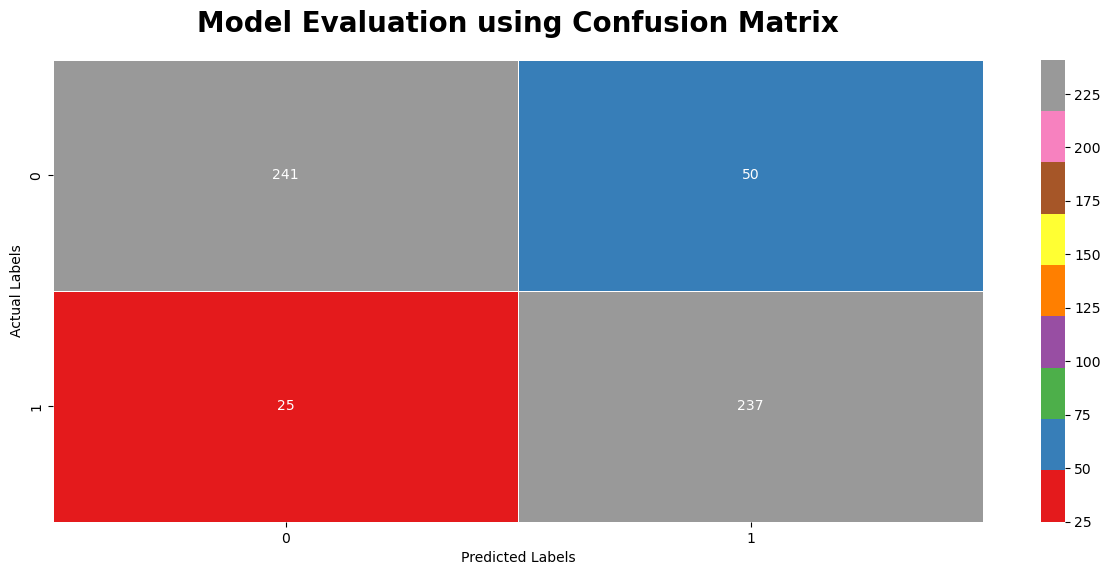

Best Parameters for DecisionTree Model: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}

Accuracy Score of Model on Training Data: 97.11 %
Accuracy Score of Model on Testing Data: 86.44 %
F1 Score of the Model: 0.8644204817274984
Recall Score of the Model: 0.864376130198915
Precision Score of the Model: 0.8680032127246179


In [86]:
# Evaluate the model
evaluate_model(dec_tree, X_train, y_train, X_test, y_test)

In [87]:
# Random Forest Classifier
rf = RandomForestClassifier()

In [88]:
# Define the hyperparameter grid for grid search
rf_param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["auto", "sqrt", "log2"],
    "random_state": [0, 42]
}

In [89]:
# Create a GridSearchCV instance for Random Forest
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5, n_jobs=-1)

In [93]:
# Perform grid search on the training data to find the best hyperparameters for Random Forest
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'random_state': [0, 42]})

In [94]:
# Retrieve the best hyperparameters found by grid search for Random Forest
rf_best_parameters = rf_grid_search.best_params_

In [95]:
# Create a new RandomForestClassifier instance with the best hyperparameters for Random Forest
rf = RandomForestClassifier(**rf_best_parameters)

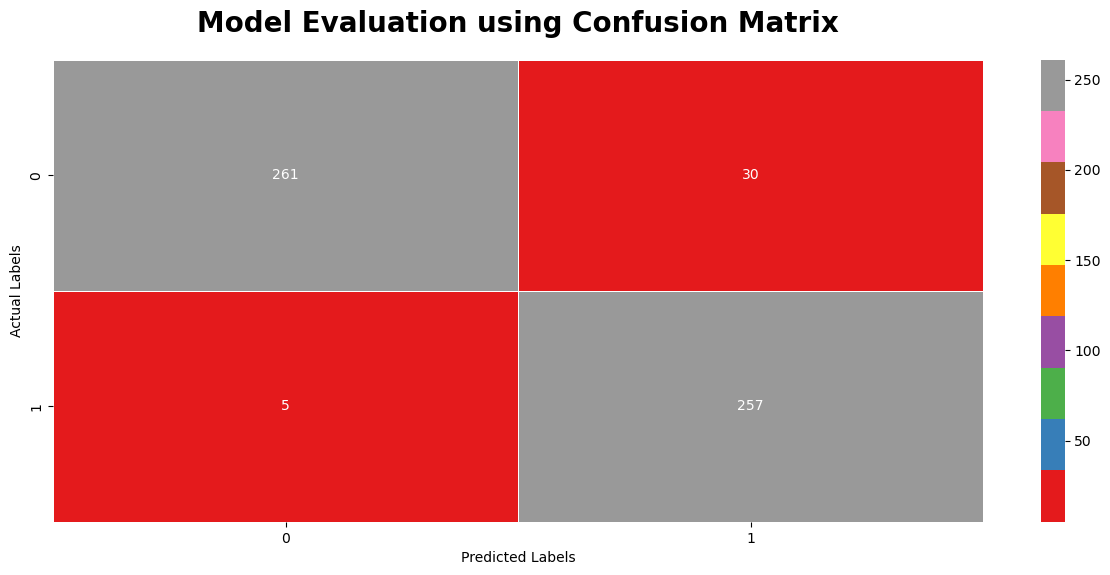

Best Parameters for DecisionTree Model: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 300, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}

Accuracy Score of Model on Training Data: 100.0 %
Accuracy Score of Model on Testing Data: 93.67 %
F1 Score of the Model: 0.9367295581394992
Recall Score of the Model: 0.9367088607594937
Precision Score of the Model: 0.9405846575155307


In [96]:
# Evaluate the Random Forest model
evaluate_model(rf, X_train, y_train, X_test, y_test)

In [97]:
# Get predicted probabilities for the positive class (class 1) using Random Forest
rf_y_pred_proba = rf.predict_proba(X_test)[:, 1]

In [99]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate ROC AUC for binary classification (positive class)
    if len(set(y_train)) == 2:
        y_train_proba = model.predict_proba(X_train)[:, 1]
        y_test_proba = model.predict_proba(X_test)[:, 1]
        train_roc_auc = roc_auc_score(y_train, y_train_proba)
        test_roc_auc = roc_auc_score(y_test, y_test_proba)
        print("ROC AUC Score on Training Data:", train_roc_auc)
        print("ROC AUC Score on Testing Data:", test_roc_auc)

        # Plot ROC curve for the positive class
        fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
        fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr_train, tpr_train, label=f"Train ROC Curve (AUC = {train_roc_auc:.2f})")
        plt.plot(fpr_test, tpr_test, label=f"Test ROC Curve (AUC = {test_roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc='lower right')
        plt.show()

ROC AUC Score on Training Data: 0.9878711372266598
ROC AUC Score on Testing Data: 0.887575089845492


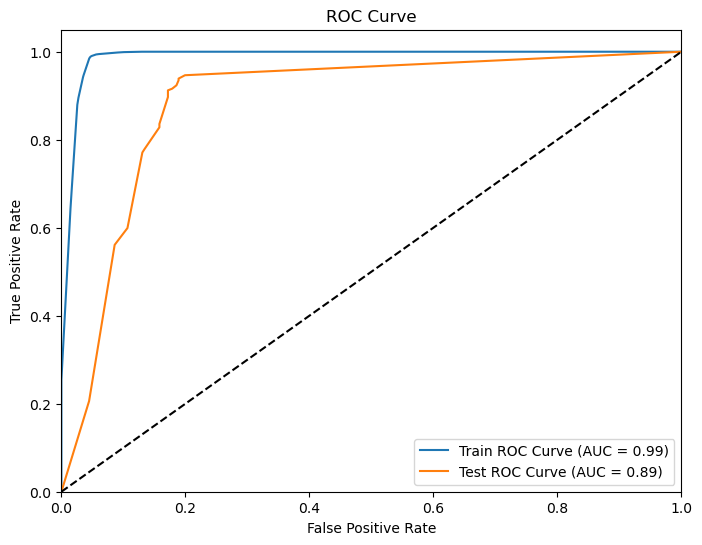

In [100]:
evaluate_model(dec_tree, X_train, y_train, X_test, y_test)

ROC AUC Score on Training Data: 1.0
ROC AUC Score on Testing Data: 0.9890021248130951


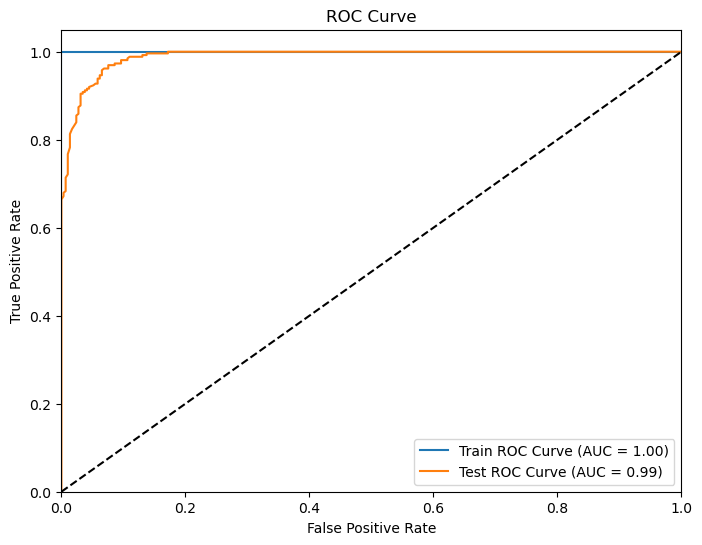

In [101]:
evaluate_model(rf, X_train, y_train, X_test, y_test)